In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [4]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,Fiido D11 review: This folding ebike has good ...
1,Fiido D11 review: A folding ebike with good lo...
2,@skepticalpark I’ve been using the eBike setti...
3,"@MPSGreenwich Jesus, this county is backwards...."
4,Fiido D11 review: This folding ebike has good ...
...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...
1996,Exploring Miami and Key Biscayne https://t.co/...
1997,@CliffordAgius Buy an eBike and get some fresh...
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...


In [5]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,Fiido D11 review: This folding ebike has good ...,0,0,CliffordEnzly
1,Fiido D11 review: A folding ebike with good lo...,0,0,Alan_Nishihara
2,@skepticalpark I’ve been using the eBike setti...,0,0,DadWearsGlasses
3,"@MPSGreenwich Jesus, this county is backwards....",0,0,pjtobin00
4,Fiido D11 review: This folding ebike has good ...,0,0,TechnoToned
...,...,...,...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...,0,1,kumar3178
1996,Exploring Miami and Key Biscayne https://t.co/...,0,0,Exped_Electric
1997,@CliffordAgius Buy an eBike and get some fresh...,0,1,normanmackay3
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...,0,0,bikes_cycling


In [6]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [7]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,Fiido D11 review: This folding ebike has good ...,0,0,CliffordEnzly,fiido d11 review folding ebike good looks low ...
1,Fiido D11 review: A folding ebike with good lo...,0,0,Alan_Nishihara,fiido d11 review folding ebike good looks low ...
2,@skepticalpark I’ve been using the eBike setti...,0,0,DadWearsGlasses,skepticalpark ive using ebike setting free ver...
3,"@MPSGreenwich Jesus, this county is backwards....",0,0,pjtobin00,mpsgreenwich jesus county backwards ride ebike...
4,Fiido D11 review: This folding ebike has good ...,0,0,TechnoToned,fiido d11 review folding ebike good looks low ...
...,...,...,...,...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...,0,1,kumar3178,bjp4haryana mlkhattar anilvijminister opdhanka...
1996,Exploring Miami and Key Biscayne https://t.co/...,0,0,Exped_Electric,exploring miami key biscayne via youtube ebike...
1997,@CliffordAgius Buy an eBike and get some fresh...,0,1,normanmackay3,cliffordagius buy ebike get fresh air
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...,0,0,bikes_cycling,48v 20ah 1000w 750w ebike lithium ion battery ...


In [8]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,Fiido D11 review: This folding ebike has good ...,0,0,CliffordEnzly,fiido d11 review folding ebike good looks low ...,0.233333,0.333333
1,Fiido D11 review: A folding ebike with good lo...,0,0,Alan_Nishihara,fiido d11 review folding ebike good looks low ...,0.350000,0.450000
2,@skepticalpark I’ve been using the eBike setti...,0,0,DadWearsGlasses,skepticalpark ive using ebike setting free ver...,0.400000,0.800000
3,"@MPSGreenwich Jesus, this county is backwards....",0,0,pjtobin00,mpsgreenwich jesus county backwards ride ebike...,0.026190,0.297619
4,Fiido D11 review: This folding ebike has good ...,0,0,TechnoToned,fiido d11 review folding ebike good looks low ...,0.233333,0.333333
...,...,...,...,...,...,...,...
1995,@BJP4Haryana @mlkhattar @anilvijminister @OPDh...,0,1,kumar3178,bjp4haryana mlkhattar anilvijminister opdhanka...,0.000000,0.000000
1996,Exploring Miami and Key Biscayne https://t.co/...,0,0,Exped_Electric,exploring miami key biscayne via youtube ebike...,0.000000,1.000000
1997,@CliffordAgius Buy an eBike and get some fresh...,0,1,normanmackay3,cliffordagius buy ebike get fresh air,0.300000,0.500000
1998,48V 20Ah 1000W 750W Ebike Lithium Ion Battery ...,0,0,bikes_cycling,48v 20ah 1000w 750w ebike lithium ion battery ...,0.000000,0.000000


In [9]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['bosch', 'yamaha', 'shimano', 'trek', 'rad', 'aventon', 'specialized']

In [10]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,bosch
1,yamaha
2,shimano
3,trek
4,rad
5,aventon
6,specialized


In [11]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [12]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,bosch,0.161579
1,yamaha,0.130952
2,shimano,0.136574
3,trek,0.202111
4,rad,0.207558
5,aventon,0.293030
6,specialized,0.177083


In [13]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

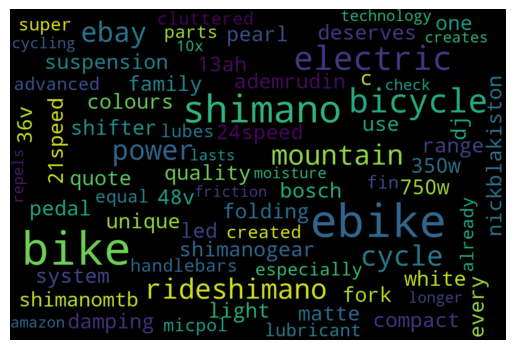

In [14]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'shimano'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [15]:
# for alternative visualizations, extract the keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(brand_all_text(b))
kwords

{'dj': 1,
 'folding': 1,
 'bike': 6,
 '750w': 1,
 '48v': 1,
 '13ah': 1,
 'power': 2,
 'electric': 3,
 'bicycle': 3,
 'pearl': 1,
 'white': 1,
 'led': 1,
 'light': 1,
 'suspension': 1,
 'fork': 1,
 'shimanogear': 1,
 'mountain': 2,
 'damping': 1,
 'ebike': 6,
 'shimano': 4,
 '21speed': 1,
 'shifter': 1,
 'c': 1,
 'ebay': 2,
 'every': 1,
 'family': 1,
 'deserves': 1,
 'quality': 1,
 'compact': 1,
 'use': 1,
 'bosch': 1,
 'system': 1,
 'unique': 1,
 'range': 1,
 'matte': 1,
 'colours': 1,
 'quote': 1,
 'one': 1,
 'pedal': 1,
 '24speed': 1,
 '350w': 1,
 '36v': 1,
 'ademrudin': 1,
 'nickblakiston': 1,
 'rideshimano': 2,
 'shimanomtb': 1,
 'especially': 1,
 'handlebars': 1,
 'cluttered': 1,
 'already': 1,
 'cycle': 2,
 'parts': 1,
 'lubes': 1,
 'created': 1,
 'equal': 1,
 'fin': 1,
 'super': 1,
 'micpol': 1,
 'advanced': 1,
 'lubricant': 1,
 'technology': 1,
 'lasts': 1,
 '10x': 1,
 'longer': 1,
 'repels': 1,
 'moisture': 1,
 'creates': 1,
 'friction': 1,
 'check': 1,
 'amazon': 1,
 'cycling

In [16]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
dj,1
folding,1
bike,6
750w,1
48v,1
...,...
creates,1
friction,1
check,1


<AxesSubplot:xlabel='keyword'>

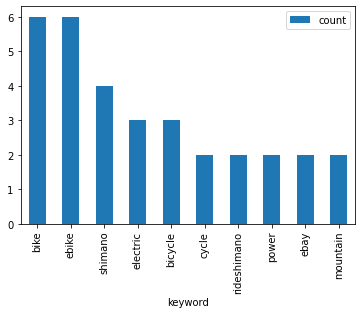

In [17]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(10).plot.bar()